# Modelagem de tópicos
### corpus: teses e dissertações 2013

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus_tesesdissertacoes_2013"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

266


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

["  uff – uff instituto de arte e comunicação social (iacs) ppgci mestrado em ciência da informacão       berta jaqueline rosa        a cultura na ciência da informação: temáticas culturais na  pós-graduação do campo informacional brasileiro - 1970-2012.                          niterói maio / 2013   \   berta jaqueline rosa                    a cultura na ciência da informação: temáticas culturais na  pós-graduação do campo informacional brasileiro - 1970-2012.        dissertação de mestrado apresentada ao ppgci da uff (ppgci-uff) como requisito parcial para obtenção do título de mestre em ciência da informação.   linha de pesquisa: informação, cultura e sociedade.  orientadora: prof.ª dr.ª lídia silva de freitas.             niterói maio / 2013   \                                        r788                 rosa, berta jaqueline, 1984 -  a cultura na ciência da informação: temáticas culturais na                  pós-graduação do campo informacional brasileiro - 1970-2012. /berta jaqu

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 6638452
Total de Bigramas: 6638186
Total de Trigramas: 6637920


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['uff', 'uff', 'instituto', 'arte', 'comunicação', 'social', 'iacs', 'ppgci', 'mestrado', 'informacão', 'berta', 'jaqueline', 'rosa', 'cultura', 'informação', 'temáticas', 'culturais', 'campo', 'informacional', 'brasileiro', 'niterói', 'berta', 'jaqueline', 'rosa', 'cultura', 'informação', 'temáticas', 'culturais', 'campo', 'informacional', 'brasileiro', 'dissertação', 'mestrado', 'apresentada', 'ppgci', 'uff', 'ppgci-uff', 'requisito', 'parcial', 'obtenção', 'mestre', 'informação', 'linha', 'pesquisa', 'informação', 'cultura', 'sociedade', 'orientadora', 'prof.ª', 'silva', 'freitas', 'niterói', 'rosa', 'berta', 'jaqueline', 'cultura', 'informação', 'temáticas', 'culturais', 'campo', 'informacional', 'brasileiro', 'jaqueline', 'rosa', 'niterói', 'orientador', 'prof.ª', 'silva', 'freitas', 'dissertação', 'mestrado', 'informação', 'universidade', 'federal', 'fluminense', 'universidade', 'federal', 'fluminense', 'informação', 'brasil', 'biblioteconomia', 'brasil', 'cultura', 'universidade

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_tesesdissertacoes_2013"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 100977, 'pesquisa': 30636, 'biblioteca': 24794, 'conhecimento': 24558, 'forma': 20329, 'processo': 19113, 'dados': 16953, 'documentos': 15630, 'trabalho': 15304, 'uso': 14881, 'comunicação': 14823, 'relação': 14763, 'brasil': 14538, 'social': 14526, 'sistema': 13146, 'organização': 12641, 'desenvolvimento': 12086, 'memória': 11964, 'meio': 11941, 'termo': 11471, 'gestão': 11470, 'usuários': 11400, 'sociedade': 11196, 'produção': 11114, 'museu': 11106, 'cultura': 11036, 'tempo': 11001, 'sociais': 10963, 'paulo': 10891, 'estudo': 10775, 'nacional': 10359, 'fonte': 10251, 'universidade': 9869, 'busca': 9652, 'anos': 9306, 'atividades': 9009, 'estudos': 8910, 'pessoas': 8892, 'cultural': 8848, 'contexto': 8819, 'educação': 8662, 'usuário': 8560, 'modelo': 8486, 'política': 8422, 'espaço': 8420, 'diferentes': 8268, 'vida': 8233, 'caso': 8195, 'serviços': 8152, 'científica': 8144, 'mundo': 7978, 'história': 7975, 'documento': 7924, 'grande': 7843, 'campo': 7701, 'recu


  PALAVRA -- FREQUÊNCIA


[('informação', 100977),
 ('pesquisa', 30636),
 ('biblioteca', 24794),
 ('conhecimento', 24558),
 ('forma', 20329),
 ('processo', 19113),
 ('dados', 16953),
 ('documentos', 15630),
 ('trabalho', 15304),
 ('uso', 14881),
 ('comunicação', 14823),
 ('relação', 14763),
 ('brasil', 14538),
 ('social', 14526),
 ('sistema', 13146),
 ('organização', 12641),
 ('desenvolvimento', 12086),
 ('memória', 11964),
 ('meio', 11941),
 ('termo', 11471),
 ('gestão', 11470),
 ('usuários', 11400),
 ('sociedade', 11196),
 ('produção', 11114),
 ('museu', 11106),
 ('cultura', 11036),
 ('tempo', 11001),
 ('sociais', 10963),
 ('paulo', 10891),
 ('estudo', 10775),
 ('nacional', 10359),
 ('fonte', 10251),
 ('universidade', 9869),
 ('busca', 9652),
 ('anos', 9306),
 ('atividades', 9009),
 ('estudos', 8910),
 ('pessoas', 8892),
 ('cultural', 8848),
 ('contexto', 8819),
 ('educação', 8662),
 ('usuário', 8560),
 ('modelo', 8486),
 ('política', 8422),
 ('espaço', 8420),
 ('diferentes', 8268),
 ('vida', 8233),
 ('caso',

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_tesesdissertacoes_2013"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 100977, 'pesquisa': 30636, 'biblioteca': 24794, 'conhecimento': 24558, 'forma': 20329, 'processo': 19113, 'dados': 16953, 'documentos': 15630, 'trabalho': 15304, 'uso': 14881, 'comunicação': 14823, 'relação': 14763, 'brasil': 14538, 'social': 14526, 'sistema': 13146, 'organização': 12641, 'desenvolvimento': 12086, 'memória': 11964, 'meio': 11941, 'termo': 11471, 'gestão': 11470, 'usuários': 11400, 'sociedade': 11196, 'produção': 11114, 'museu': 11106, 'cultura': 11036, 'tempo': 11001, 'sociais': 10963, 'paulo': 10891, 'estudo': 10775, 'nacional': 10359, 'fonte': 10251, 'universidade': 9869, 'busca': 9652, 'anos': 9306, 'atividades': 9009, 'estudos': 8910, 'pessoas': 8892, 'cultural': 8848, 'contexto': 8819, 'educação': 8662, 'usuário': 8560, 'modelo': 8486, 'política': 8422, 'espaço': 8420, 'diferentes': 8268, 'vida': 8233, 'caso': 8195, 'serviços': 8152, 'científica': 8144, 'mundo': 7978, 'história': 7975, 'documento': 7924, 'grande': 7843, 'campo': 7701, 'recu

[('informação', 100977),
 ('pesquisa', 30636),
 ('biblioteca', 24794),
 ('conhecimento', 24558),
 ('forma', 20329),
 ('processo', 19113),
 ('dados', 16953),
 ('documentos', 15630),
 ('trabalho', 15304),
 ('uso', 14881),
 ('comunicação', 14823),
 ('relação', 14763),
 ('brasil', 14538),
 ('social', 14526),
 ('sistema', 13146),
 ('organização', 12641),
 ('desenvolvimento', 12086),
 ('memória', 11964),
 ('meio', 11941),
 ('termo', 11471),
 ('gestão', 11470),
 ('usuários', 11400),
 ('sociedade', 11196),
 ('produção', 11114),
 ('museu', 11106),
 ('cultura', 11036),
 ('tempo', 11001),
 ('sociais', 10963),
 ('paulo', 10891),
 ('estudo', 10775),
 ('nacional', 10359),
 ('fonte', 10251),
 ('universidade', 9869),
 ('busca', 9652),
 ('anos', 9306),
 ('atividades', 9009),
 ('estudos', 8910),
 ('pessoas', 8892),
 ('cultural', 8848),
 ('contexto', 8819),
 ('educação', 8662),
 ('usuário', 8560),
 ('modelo', 8486),
 ('política', 8422),
 ('espaço', 8420),
 ('diferentes', 8268),
 ('vida', 8233),
 ('caso',

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_tesesdissertacoes_2013"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'universidade_federal': 2895, 'recuperação_informação': 2728, 'redes_sociais': 2542, 'uso_informação': 2385, 'informação_conhecimento': 2329, 'belo_horizonte': 1943, 'gestão_informação': 1825, 'biblioteca_universitárias': 1804, 'ensino_superior': 1794, 'ponto_vista': 1757, 'coleta_dados': 1694, 'muitas_vezes': 1644, 'fontes_informação': 1638, 'patrimônio_cultural': 1613, 'dissertação_mestrado': 1600, 'sistemas_informação': 1579, 'informação_tecnologia': 1572, 'gestão_documentos': 1517, 'produção_científica': 1494, 'comunicação_científica': 1493, 'informação_science': 1491, 'tecnologias_informação': 1406, 'competência_informacional': 1404, 'informação_informação': 1396, 'tomada_decisão': 1305, 'informação_comunicação': 1303, 'minas_gerais': 1236, 'arquitetura_informação': 1231, 'bases_dados': 1226, 'busca_informação': 1204, 'sociedade_informação': 1197, 'biblioteca_universitária': 1185, 'organização_conhecimento': 1182, 'porto_alegre': 1151, 'dados_pesquisa': 1117, 'base_dados


  PALAVRA -- FREQUÊNCIA


[('universidade_federal', 2895),
 ('recuperação_informação', 2728),
 ('redes_sociais', 2542),
 ('uso_informação', 2385),
 ('informação_conhecimento', 2329),
 ('belo_horizonte', 1943),
 ('gestão_informação', 1825),
 ('biblioteca_universitárias', 1804),
 ('ensino_superior', 1794),
 ('ponto_vista', 1757),
 ('coleta_dados', 1694),
 ('muitas_vezes', 1644),
 ('fontes_informação', 1638),
 ('patrimônio_cultural', 1613),
 ('dissertação_mestrado', 1600),
 ('sistemas_informação', 1579),
 ('informação_tecnologia', 1572),
 ('gestão_documentos', 1517),
 ('produção_científica', 1494),
 ('comunicação_científica', 1493),
 ('informação_science', 1491),
 ('tecnologias_informação', 1406),
 ('competência_informacional', 1404),
 ('informação_informação', 1396),
 ('tomada_decisão', 1305),
 ('informação_comunicação', 1303),
 ('minas_gerais', 1236),
 ('arquitetura_informação', 1231),
 ('bases_dados', 1226),
 ('busca_informação', 1204),
 ('sociedade_informação', 1197),
 ('biblioteca_universitária', 1185),
 ('or

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_tesesdissertacoes_2013"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'fonte_dados_pesquisa': 846, 'tecnologias_informação_comunicação': 762, 'machine_readable_cataloging': 555, 'international_organization_standardization': 510, 'extensible_markup_language': 460, 'dissertação_mestrado_informação': 452, 'instituição_ensino_superior': 441, 'portal_periódicos_capes': 434, 'instituições_ensino_superior': 406, 'patrimônio_histórico_artístico': 380, 'fonte_elaborado_autora': 345, 'informação_universidade_federal': 318, 'american_society_informação': 317, 'universidade_federal_bahia': 313, 'society_informação_science': 312, 'federal_minas_gerais': 312, 'gestão_informação_conhecimento': 311, 'resource_description_framework': 310, 'informação_belo_horizonte': 303, 'universidade_federal_minas': 302, 'universidade_federal_grande': 301, 'segunda_guerra_mundial': 300, 'sistemas_organização_conhecimento': 284, 'universidade_federal_paraíba': 283, 'trabalho_conclusão_curso': 281, 'busca_uso_informação': 279, 'american_library_association': 279, 'histórico_art


  PALAVRA -- FREQUÊNCIA


[('fonte_dados_pesquisa', 846),
 ('tecnologias_informação_comunicação', 762),
 ('machine_readable_cataloging', 555),
 ('international_organization_standardization', 510),
 ('extensible_markup_language', 460),
 ('dissertação_mestrado_informação', 452),
 ('instituição_ensino_superior', 441),
 ('portal_periódicos_capes', 434),
 ('instituições_ensino_superior', 406),
 ('patrimônio_histórico_artístico', 380),
 ('fonte_elaborado_autora', 345),
 ('informação_universidade_federal', 318),
 ('american_society_informação', 317),
 ('universidade_federal_bahia', 313),
 ('society_informação_science', 312),
 ('federal_minas_gerais', 312),
 ('gestão_informação_conhecimento', 311),
 ('resource_description_framework', 310),
 ('informação_belo_horizonte', 303),
 ('universidade_federal_minas', 302),
 ('universidade_federal_grande', 301),
 ('segunda_guerra_mundial', 300),
 ('sistemas_organização_conhecimento', 284),
 ('universidade_federal_paraíba', 283),
 ('trabalho_conclusão_curso', 281),
 ('busca_uso_in

## Gráfico

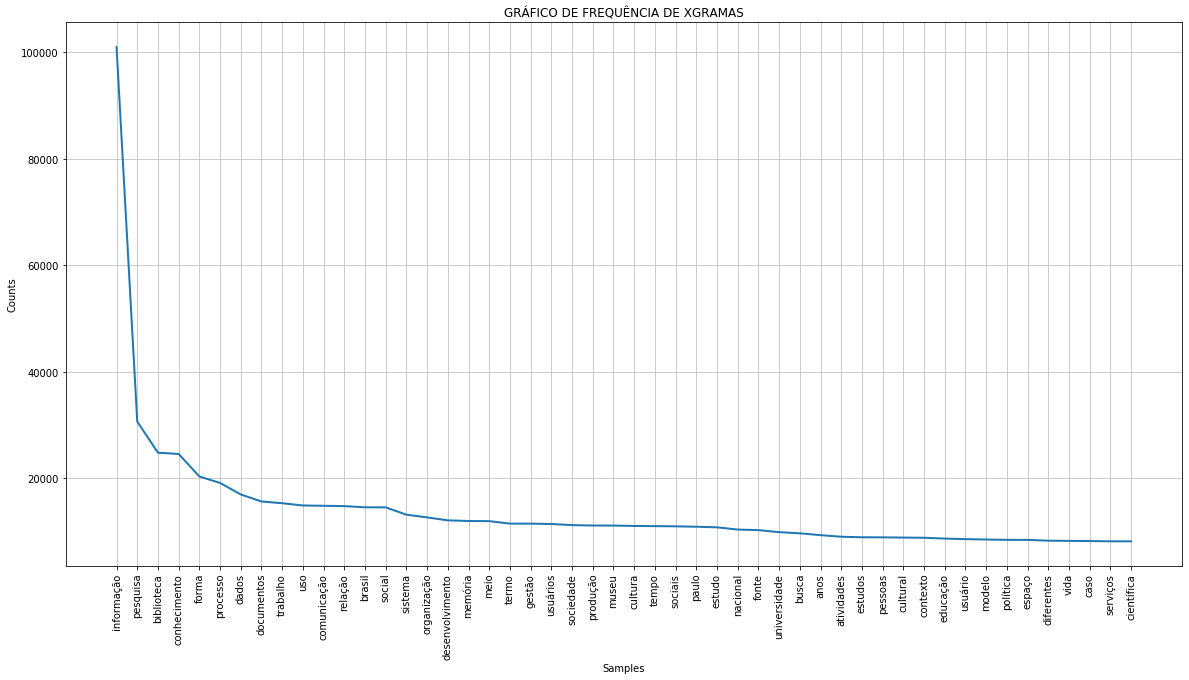

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

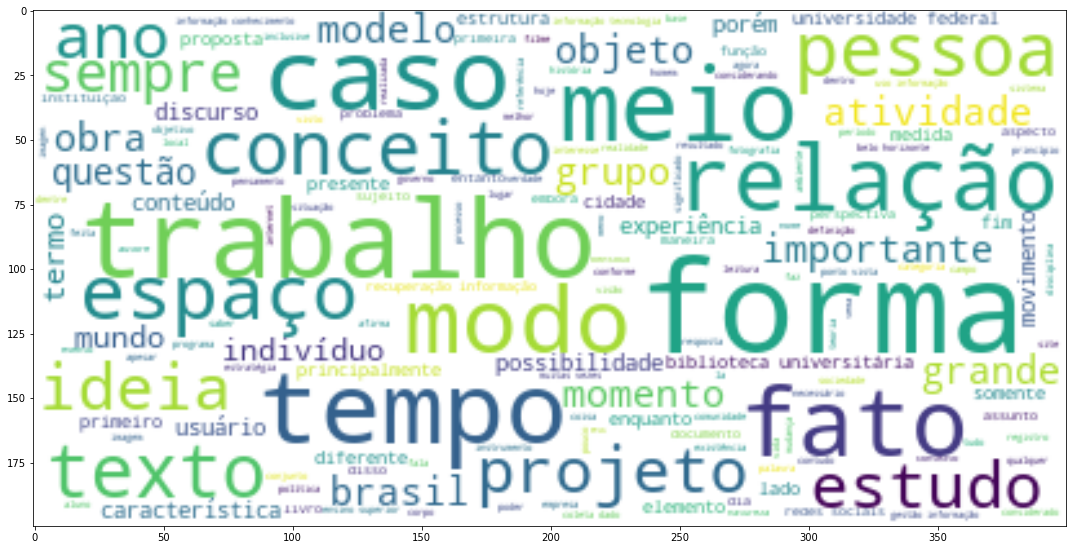

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("tesesdissertacoes_nuv_2013.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 24min 4s
Tópico 0:  0.000*"honneth,2003" + 0.000*"habermas,2007" + 0.000*"ouseja" + 0.000*"nobrasil" + 0.000*"pereira,2007" + 0.000*"alberti" + 0.000*"honneth,2008" + 0.000*"lewandowiski,2012" + 0.000*"riodejaneiro" + 0.000*"emancipaçãoejustiça"
Tópico 1:  0.001*"zoo" + 0.001*"park" + 0.001*"temáticas" + 0.000*"zoológico" + 0.000*"dissertações" + 0.000*"categorias_temáticas" + 0.000*"aves" + 0.000*"animais" + 0.000*"aquarium" + 0.000*"subcategorias_temáticas"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"brasil" + 0.000*"trabalho" + 0.000*"universidade" + 0.000*"forma" + 0.000*"comunicação" + 0.000*"processo" + 0.000*"dados" + 0.000*"social"
Tópico 3:  0.000*"aquicultura" + 0.000*"aquaculture" + 0.000*"print" + 0.000*"periódicos_publicaram_artigo" + 0.000*"coautores/artigo" + 0.000*"periódicos_publicaram" + 0.000*"publicaram_artigo" + 0.000*"biol

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 25min 45s
Tópico 0:  0.003*"cinema" + 0.002*"filmes" + 0.001*"cinemas" + 0.001*"filme" + 0.001*"salas" + 0.001*"tijuca" + 0.001*"cine" + 0.000*"exibição" + 0.000*"cinematográficos" + 0.000*"proponente"
Tópico 1:  0.001*"ombudsman" + 0.001*"convenção" + 0.001*"cambury" + 0.001*"praça" + 0.001*"manaus" + 0.000*"recife" + 0.000*"trabalho_infantil" + 0.000*"paisagem" + 0.000*"agrupamento" + 0.000*"museu_cidade"
Tópico 2:  0.000*"chat" + 0.000*"via_chat" + 0.000*"forma_expressiva" + 0.000*"contexto/conceito" + 0.000*"platinum" + 0.000*"contexto/conceito_abstrato" + 0.000*"bancos_imagens" + 0.000*"abstrato" + 0.000*"expressiva" + 0.000*"conversacionais"
Tópico 3:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"termo" + 0.000*"relação" + 0.000*"conhecimento" + 0.000*"trabalho" + 0.000*"dados" + 0.000*"sistema"
Tópico 4:  0.001*"

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 45min 18s
Tópico 0:  0.000*"finaestampa" + 0.000*"passione" + 0.000*"insensatocoração" + 0.000*"xxx" + 0.000*"dec" + 0.000*"dec_xxx" + 0.000*"tuiteiros" + 0.000*"monipi1" + 0.000*"you_dec" + 0.000*"you_dec_xxx"
Tópico 1:  0.000*"honneth,2003" + 0.000*"habermas,2007" + 0.000*"ouseja" + 0.000*"alberti" + 0.000*"pereira,2007" + 0.000*"nobrasil" + 0.000*"discriminaçãoracial" + 0.000*"lewandowiski,2012" + 0.000*"riodejaneiro" + 0.000*"nobre,2008"
Tópico 2:  0.000*"informação" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"trabalho" + 0.000*"museu" + 0.000*"brasil" + 0.000*"dados" + 0.000*"processo" + 0.000*"social" + 0.000*"imagem"
Tópico 3:  0.001*"convenção" + 0.001*"concordo" + 0.001*"trabalho_infantil" + 0.000*"concordo_concordo" + 0.000*"internacional_trabalho" + 0.000*"tdah" + 0.000*"objn" + 0.000*"concordo_totalmente" + 0.000*"totalmente_concordo" + 0.000*"pi

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 33min 24s
Tópico 0:  0.000*"informação" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"cultura" + 0.000*"processo" + 0.000*"história" + 0.000*"relação" + 0.000*"comunicação" + 0.000*"social" + 0.000*"museu"
Tópico 1:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"brasil" + 0.000*"dados" + 0.000*"forma" + 0.000*"uso" + 0.000*"processo" + 0.000*"fonte" + 0.000*"trabalho"
Tópico 2:  0.000*"informação" + 0.000*"forma" + 0.000*"conhecimento" + 0.000*"processo" + 0.000*"trabalho" + 0.000*"termo" + 0.000*"dados" + 0.000*"relação" + 0.000*"uso" + 0.000*"pesquisa"
Tópico 3:  0.003*"zoo" + 0.002*"park" + 0.001*"zoológico" + 0.001*"aves" + 0.001*"recife" + 0.001*"animais" + 0.001*"aquarium" + 0.001*"doação" + 0.001*"jardim" + 0.001*"mammalia"
Tópico 4:  0.002*"cinema" + 0.002*"cinemas" + 0.001*"salas" + 0.001*"cine" + 0.001*"exibição" + 0.001*"cine

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 40min 46s
Tópico 0:  0.002*"telenovela" + 0.001*"passione" + 0.001*"finaestampa" + 0.001*"telenovelas" + 0.001*"novela" + 0.001*"insensatocoração" + 0.001*"rede_globo" + 0.001*"tuiteiros" + 0.001*"globo" + 0.000*"twitter"
Tópico 1:  0.000*"informação" + 0.000*"documentos" + 0.000*"pesquisa" + 0.000*"documento" + 0.000*"forma" + 0.000*"arquivos" + 0.000*"gestão" + 0.000*"trabalho" + 0.000*"conhecimento" + 0.000*"processo"
Tópico 2:  0.002*"futebol" + 0.002*"clube" + 0.001*"jogadores" + 0.001*"clubes" + 0.001*"campeonato" + 0.001*"atletas" + 0.000*"esporte" + 0.000*"estádio" + 0.000*"time" + 0.000*"equipe"
Tópico 3:  0.001*"indicadores" + 0.001*"biblioteca" + 0.001*"desempenho" + 0.001*"cfc" + 0.001*"macrorregião" + 0.001*"indicadores_desempenho" + 0.001*"percentual" + 0.000*"tomada_decisão" + 0.000*"indicador" + 0.000*"tomada"
Tópico 4:  0.000*"honneth,2003" 

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 48min 11s
Tópico 0:  0.001*"passione" + 0.001*"finaestampa" + 0.001*"telenovela" + 0.001*"insensatocoração" + 0.001*"tuiteiros" + 0.001*"twitter" + 0.001*"tweets" + 0.001*"novela" + 0.000*"xxx" + 0.000*"dec"
Tópico 1:  0.001*"iphaep" + 0.000*"dec._iphaep" + 0.000*"iphaep_edificação" + 0.000*"dec." + 0.000*"dec._iphaep_edificação" + 0.000*"edificação" + 0.000*"pessoa_dec." + 0.000*"pessoa_dec._iphaep" + 0.000*"iphaep_conjunto" + 0.000*"edificação_igreja"
Tópico 2:  0.008*"patrimônio" + 0.006*"museu" + 0.003*"museologia" + 0.003*"cinema" + 0.003*"cultural" + 0.002*"patrimônio_cultural" + 0.002*"cidade" + 0.002*"obras" + 0.002*"cinemas" + 0.001*"preservação"
Tópico 3:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"museu" + 0.000*"forma" + 0.000*"processo" + 0.000*"zoo" + 0.000*"conhecimento" + 0.000*"brasil" + 0.000*"meio" + 0.000*"comunicação"
Tópico 4:  0.00

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 1h 7min 31s
Tópico 0:  0.000*"informação" + 0.000*"arquetípico_nove" + 0.000*"produz_progride" + 0.000*"monstro_devorante" + 0.000*"tassara" + 0.000*"queda_desenho" + 0.000*"gira_produz_progride" + 0.000*"at-9" + 0.000*"dimensões_simbólicas_afetivas" + 0.000*"resolver_angústia"
Tópico 1:  0.002*"facetada" + 0.001*"facetas" + 0.001*"taxonomia" + 0.001*"planejamento" + 0.001*"planejamento_estratégico" + 0.001*"estratégico" + 0.001*"fig" + 0.001*"ranganathan" + 0.001*"ibge" + 0.001*"faceta"
Tópico 2:  0.001*"recife" + 0.001*"arquivísticos" + 0.001*"rem/pb" + 0.001*"audiovisual" + 0.001*"documentos_arquivísticos" + 0.001*"audiovisuais" + 0.001*"usuários_internos" + 0.001*"documentos_audiovisuais" + 0.000*"documentos" + 0.000*"museólogo"
Tópico 3:  0.008*"informação" + 0.007*"biblioteca" + 0.005*"pesquisa" + 0.002*"dados" + 0.002*"usuários" + 0.002*"conhecimento"

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 1h 3min 57s
Tópico 0:  0.000*"informação" + 0.000*"memória" + 0.000*"social" + 0.000*"documentos" + 0.000*"trabalho" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"brasil" + 0.000*"sociais" + 0.000*"processo"
Tópico 1:  0.003*"memória" + 0.003*"museu" + 0.003*"forma" + 0.002*"social" + 0.002*"cultura" + 0.002*"cultural" + 0.002*"brasil" + 0.002*"paulo" + 0.002*"história" + 0.002*"processo"
Tópico 2:  0.002*"concordo" + 0.001*"concordo_concordo" + 0.001*"concordo_totalmente" + 0.001*"totalmente_concordo" + 0.001*"concordo_totalmente_concordo" + 0.000*"concordo_concordo_concordo" + 0.000*"discordo" + 0.000*"totalmente" + 0.000*"universo_amostral" + 0.000*"concordo_discordo"
Tópico 3:  0.001*"iepha/mg" + 0.000*"robin" + 0.000*"robin_hood" + 0.000*"hood" + 0.000*"lei_robin" + 0.000*"lei_robin_hood" + 0.000*"pcl" + 0.000*"estadual_patrimônio_histórico" + 0.000*"polí

Tópico 36:  0.001*"recife" + 0.000*"pernambuco" + 0.000*"recife_pernambuco_brasil" + 0.000*"recife_pernambuco" + 0.000*"pernambuco_brasil" + 0.000*"cais" + 0.000*"paisagem_vista" + 0.000*"grande_angular" + 0.000*"angular" + 0.000*"santo_antônio"
Tópico 37:  0.000*"informação" + 0.000*"conhecimento" + 0.000*"cultura" + 0.000*"pesquisa" + 0.000*"memória" + 0.000*"forma" + 0.000*"trabalho" + 0.000*"comunicação" + 0.000*"social" + 0.000*"organização"


### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 59min 25s
Tópico 0:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"conhecimento" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"periódicos" + 0.000*"comunicação" + 0.000*"forma" + 0.000*"organização" + 0.000*"paulo"
Tópico 1:  0.000*"informação" + 0.000*"social" + 0.000*"pesquisa" + 0.000*"brasil" + 0.000*"relação" + 0.000*"tempo" + 0.000*"forma" + 0.000*"paulo" + 0.000*"comunicação" + 0.000*"vida"
Tópico 2:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"documentos" + 0.000*"vida" + 0.000*"tempo" + 0.000*"meio" + 0.000*"nacional" + 0.000*"forma" + 0.000*"memória" + 0.000*"gestão"
Tópico 3:  0.000*"museu" + 0.000*"informação" + 0.000*"documentos" + 0.000*"brasil" + 0.000*"conhecimento" + 0.000*"pesquisa" + 0.000*"nacional" + 0.000*"cultura" + 0.000*"obras" + 0.000*"política"
Tópico 4:  0.004*"aborto" + 0.002*"dilma" + 0.001*"tema_aborto" + 0.000*"hgpe" + 0.0

Tópico 40:  0.000*"informação" + 0.000*"biblioteconomia" + 0.000*"arquivologia" + 0.000*"museologia" + 0.000*"relação" + 0.000*"forma" + 0.000*"brasil" + 0.000*"pesquisa" + 0.000*"cursos" + 0.000*"conhecimento"
Tópico 41:  0.000*"termo" + 0.000*"informação" + 0.000*"documentos" + 0.000*"pesquisa" + 0.000*"memória" + 0.000*"relação" + 0.000*"tempo" + 0.000*"forma" + 0.000*"processo" + 0.000*"diferentes"


## Imprimir o melhor resultado - LDA

In [ ]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [ ]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_tesesdissertacoes_2013.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 7min 6s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  0.728*"biblioteca" + 0.224*"usuários" + 0.161*"serviços" + 0.151*"usuário" + 0.129*"redes" + -0.125*"documentos" + 0.120*"redes_sociais" + 0.116*"web" + -0.096*"museu" + -0.096*"informação"
Tópico #3:  -0.532*"documentos" + -0.245*"arquivo" + -0.232*"arquivos" + -0.228*"gestão" + -0.143*"documento" + -0.116*"arquivística" + -0.113*"documental" + 0.110*"conhecimento" + -0.108*"nacional" + 0.105*"aprendizagem"
Tópico #4:  0.274*"museu" + -0.19

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 7min 27s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  0.728*"biblioteca" + 0.224*"usuários" + 0.161*"serviços" + 0.151*"usuário" + 0.129*"redes" + -0.125*"documentos" + 0.120*"redes_sociais" + 0.116*"web" + -0.096*"museu" + -0.096*"informação"
Tópico #3:  -0.532*"documentos" + -0.245*"arquivo" + -0.232*"arquivos" + -0.228*"gestão" + -0.143*"documento" + -0.116*"arquivística" + -0.113*"documental" + 0.110*"conhecimento" + -0.108*"nacional" + 0.105*"aprendizagem"
Tópico #4:  0.274*"museu" + -0.1

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 8min 2s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  -0.533*"informação" + 0.190*"biblioteca" + 0.158*"museu" + 0.135*"brasil" + 0.135*"memória" + 0.116*"cultural" + 0.113*"forma" + 0.111*"documentos" + 0.109*"patrimônio" + 0.106*"cultura"
Tópico #2:  -0.728*"biblioteca" + -0.224*"usuários" + -0.161*"serviços" + -0.151*"usuário" + -0.129*"redes" + 0.125*"documentos" + -0.120*"redes_sociais" + -0.116*"web" + 0.096*"museu" + 0.096*"informação"
Tópico #3:  -0.532*"documentos" + -0.245*"arquivo" + -0.232*"arquivos" + -0.228*"gestão" + -0.143*"documento" + -0.116*"arquivística" + -0.113*"documental" + 0.110*"conhecimento" + -0.108*"nacional" + 0.105*"aprendizagem"
Tópico #4:  -0.274*"museu" + 0.192*"t

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 8min 46s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  -0.728*"biblioteca" + -0.224*"usuários" + -0.161*"serviços" + -0.151*"usuário" + -0.129*"redes" + 0.125*"documentos" + -0.120*"redes_sociais" + -0.116*"web" + 0.096*"museu" + 0.096*"informação"
Tópico #3:  0.532*"documentos" + 0.245*"arquivo" + 0.232*"arquivos" + 0.228*"gestão" + 0.143*"documento" + 0.116*"arquivística" + 0.113*"documental" + -0.110*"conhecimento" + 0.108*"nacional" + -0.105*"aprendizagem"
Tópico #4:  -0.274*"museu" + 0.192

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 10min 2s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  0.728*"biblioteca" + 0.224*"usuários" + 0.161*"serviços" + 0.151*"usuário" + 0.129*"redes" + -0.125*"documentos" + 0.120*"redes_sociais" + 0.116*"web" + -0.096*"museu" + -0.096*"informação"
Tópico #3:  -0.532*"documentos" + -0.245*"arquivo" + -0.232*"arquivos" + -0.228*"gestão" + -0.143*"documento" + -0.116*"arquivística" + -0.113*"documental" + 0.110*"conhecimento" + -0.108*"nacional" + 0.105*"aprendizagem"
Tópico #4:  -0.274*"museu" + 0.1

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 9min 47s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  -0.533*"informação" + 0.190*"biblioteca" + 0.158*"museu" + 0.135*"brasil" + 0.135*"memória" + 0.116*"cultural" + 0.113*"forma" + 0.111*"documentos" + 0.109*"patrimônio" + 0.106*"cultura"
Tópico #2:  -0.728*"biblioteca" + -0.224*"usuários" + -0.161*"serviços" + -0.151*"usuário" + -0.129*"redes" + 0.125*"documentos" + -0.120*"redes_sociais" + -0.116*"web" + 0.096*"museu" + 0.096*"informação"
Tópico #3:  0.532*"documentos" + 0.245*"arquivo" + 0.232*"arquivos" + 0.228*"gestão" + 0.143*"documento" + 0.116*"arquivística" + 0.113*"documental" + -0.110*"conhecimento" + 0.108*"nacional" + -0.105*"aprendizagem"
Tópico #4:  0.274*"museu" + -0.192*"termo"

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 10min 23s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  -0.728*"biblioteca" + -0.224*"usuários" + -0.161*"serviços" + -0.151*"usuário" + -0.129*"redes" + 0.125*"documentos" + -0.120*"redes_sociais" + -0.116*"web" + 0.096*"museu" + 0.096*"informação"
Tópico #3:  -0.532*"documentos" + -0.245*"arquivo" + -0.232*"arquivos" + -0.228*"gestão" + -0.143*"documento" + -0.116*"arquivística" + -0.113*"documental" + 0.110*"conhecimento" + -0.108*"nacional" + 0.105*"aprendizagem"
Tópico #4:  0.274*"museu" +

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 12min 2s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  0.533*"informação" + -0.190*"biblioteca" + -0.158*"museu" + -0.135*"brasil" + -0.135*"memória" + -0.116*"cultural" + -0.113*"forma" + -0.111*"documentos" + -0.109*"patrimônio" + -0.106*"cultura"
Tópico #2:  -0.728*"biblioteca" + -0.224*"usuários" + -0.161*"serviços" + -0.151*"usuário" + -0.129*"redes" + 0.125*"documentos" + -0.120*"redes_sociais" + -0.116*"web" + 0.096*"museu" + 0.096*"informação"
Tópico #3:  0.532*"documentos" + 0.245*"arquivo" + 0.232*"arquivos" + 0.228*"gestão" + 0.143*"documento" + 0.116*"arquivística" + 0.113*"documental" + -0.110*"conhecimento" + 0.108*"nacional" + -0.105*"aprendizagem"
Tópico #4:  0.274*"museu" + -0.192

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 12min 57s
Tópico #0:  0.708*"informação" + 0.175*"pesquisa" + 0.168*"biblioteca" + 0.147*"conhecimento" + 0.099*"processo" + 0.096*"dados" + 0.093*"forma" + 0.092*"uso" + 0.086*"comunicação" + 0.082*"gestão"
Tópico #1:  -0.533*"informação" + 0.190*"biblioteca" + 0.158*"museu" + 0.135*"brasil" + 0.135*"memória" + 0.116*"cultural" + 0.113*"forma" + 0.111*"documentos" + 0.109*"patrimônio" + 0.106*"cultura"
Tópico #2:  0.728*"biblioteca" + 0.224*"usuários" + 0.161*"serviços" + 0.151*"usuário" + 0.129*"redes" + -0.125*"documentos" + 0.120*"redes_sociais" + 0.116*"web" + -0.096*"museu" + -0.096*"informação"
Tópico #3:  0.532*"documentos" + 0.245*"arquivo" + 0.232*"arquivos" + 0.228*"gestão" + 0.143*"documento" + 0.116*"arquivística" + 0.113*"documental" + -0.110*"conhecimento" + 0.108*"nacional" + -0.105*"aprendizagem"
Tópico #4:  -0.274*"museu" + 0.192*"termo" + 

Tópico #40:  -0.228*"aluno" + 0.177*"referência" + -0.175*"alunos" + 0.171*"cultura" + -0.152*"gente" + 0.136*"leitura" + 0.135*"usuário" + -0.119*"aprendizagem" + 0.111*"bibliotecário" + -0.105*"direito"
Tópico #41:  -0.144*"planejamento" + -0.141*"discurso" + -0.138*"aluno" + 0.123*"obras" + 0.122*"arte" + -0.121*"ombudsman" + 0.120*"periódicos" + -0.116*"digitais" + 0.109*"conhecimento" + -0.109*"gestão"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))